In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# **1**

## 1.1

In [3]:
df = pd.read_csv("Student_Performance.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             10000 non-null  int64  
 1   Hours Studied                     9990 non-null   float64
 2   Previous Scores                   9990 non-null   float64
 3   Extracurricular Activities        9990 non-null   object 
 4   Sleep Hours                       9990 non-null   float64
 5   Sample Question Papers Practiced  9990 non-null   float64
 6   Performance Index                 10000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 547.0+ KB
None


,Index,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0,7.0,99.0,Yes,9.0,1.0,91
1,1,4.0,82.0,No,4.0,2.0,65
2,2,8.0,51.0,Yes,7.0,2.0,45
3,3,5.0,52.0,Yes,5.0,2.0,36
4,4,7.0,75.0,No,8.0,5.0,66


In [4]:
df.isnull().sum()

Index                                0
Hours Studied                       10
Previous Scores                     10
Extracurricular Activities          10
Sleep Hours                         10
Sample Question Papers Practiced    10
Performance Index                    0
dtype: int64

In [5]:
df_dropNull = df.dropna()
df_dropNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9950 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             9950 non-null   int64  
 1   Hours Studied                     9950 non-null   float64
 2   Previous Scores                   9950 non-null   float64
 3   Extracurricular Activities        9950 non-null   object 
 4   Sleep Hours                       9950 non-null   float64
 5   Sample Question Papers Practiced  9950 non-null   float64
 6   Performance Index                 9950 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 621.9+ KB


## 1.2

In [6]:
df_filled = df.fillna(df.median(numeric_only=True)) # fill with median but you can use other methods to predict them like regression or Knn

df_filled["Extracurricular Activities"] = df["Extracurricular Activities"].fillna(df["Extracurricular Activities"].mode()[0])
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             10000 non-null  int64  
 1   Hours Studied                     10000 non-null  float64
 2   Previous Scores                   10000 non-null  float64
 3   Extracurricular Activities        10000 non-null  object 
 4   Sleep Hours                       10000 non-null  float64
 5   Sample Question Papers Practiced  10000 non-null  float64
 6   Performance Index                 10000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 547.0+ KB


## 1.4

I convert categorical feature to number sooner because I wanted to use `df_filled.corr()` in question `1.3`.

In [7]:
df_filled["Extracurricular Activities"] = df_filled["Extracurricular Activities"].map({"Yes": 1, "No": 0})
df_filled.head()

,Index,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0,7.0,99.0,1,9.0,1.0,91
1,1,4.0,82.0,0,4.0,2.0,65
2,2,8.0,51.0,1,7.0,2.0,45
3,3,5.0,52.0,1,5.0,2.0,36
4,4,7.0,75.0,0,8.0,5.0,66


## 1.3

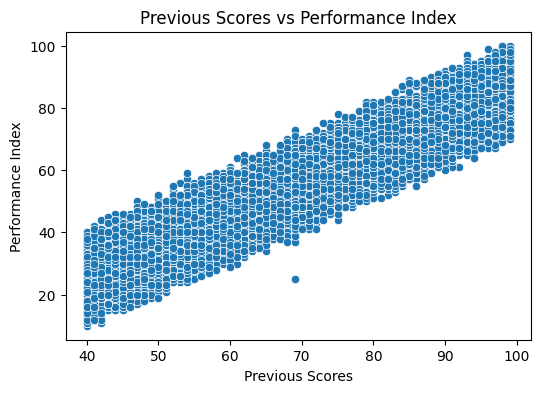

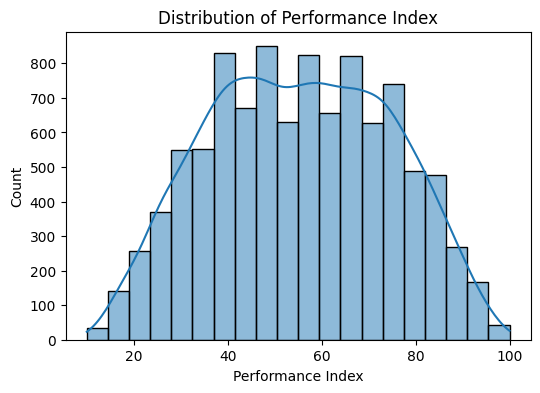

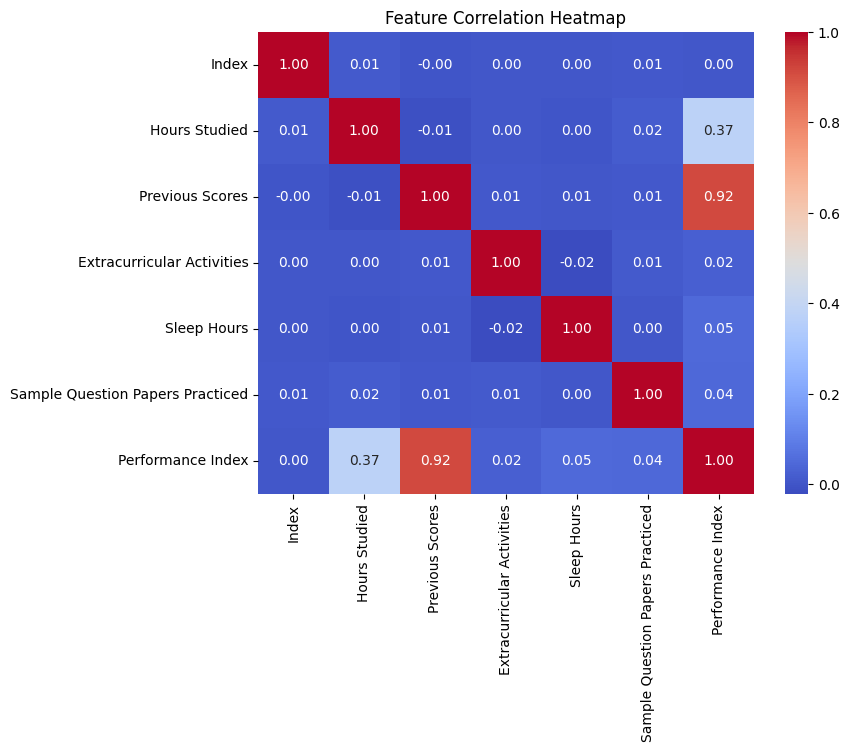

In [8]:
# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_filled["Previous Scores"], y=df_filled["Performance Index"])
plt.title("Previous Scores vs Performance Index")
plt.show()

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df_filled["Performance Index"], bins=20, kde=True)
plt.title("Distribution of Performance Index")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_filled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## 1.5

In [9]:
scaler = MinMaxScaler()
cols_to_transform = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
df_filled[cols_to_transform] = scaler.fit_transform(df_filled[cols_to_transform])

df_filled.head()

,Index,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0,0.750,1.000000,1,1.0,0.111111,91
1,1,0.375,0.711864,0,0.0,0.222222,65
2,2,0.875,0.186441,1,0.6,0.222222,45
3,3,0.500,0.203390,1,0.2,0.222222,36
4,4,0.750,0.593220,0,0.8,0.555556,66


## 1.6

In [10]:
print(df.duplicated().value_counts())
print()

df_no_duplicates = df_filled.drop_duplicates()
df_no_duplicates.info()

False    10000
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             10000 non-null  int64  
 1   Hours Studied                     10000 non-null  float64
 2   Previous Scores                   10000 non-null  float64
 3   Extracurricular Activities        10000 non-null  int64  
 4   Sleep Hours                       10000 non-null  float64
 5   Sample Question Papers Practiced  10000 non-null  float64
 6   Performance Index                 10000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 547.0 KB


# **2**

## 2.1

#### Helper functions

In [12]:
def add_bias(x):
    return np.c_[np.ones(x.shape[0]), x]

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def plot_error(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history, label=title)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

X_train = df_no_duplicates.drop(columns=['Index', 'Performance Index'])
X_train = add_bias(X_train)

y_train = df_no_duplicates['Performance Index'].to_numpy()

### GD

iteration 100, mse loss: 2247.201647567106
iteration 200, mse loss: 1501.7044525094898
iteration 300, mse loss: 1032.5899644525773
iteration 400, mse loss: 736.71961135982
iteration 500, mse loss: 549.460824409858
iteration 600, mse loss: 430.31055856405504
iteration 700, mse loss: 353.88639071005804
iteration 800, mse loss: 304.2811650192195
iteration 900, mse loss: 271.52537683162524
iteration 1000, mse loss: 249.3703531693002


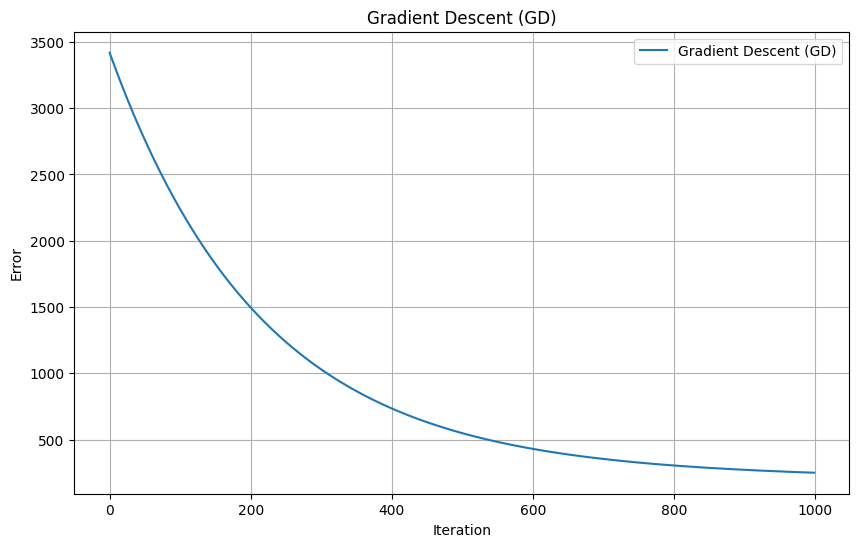

In [19]:
def gradient_descent(x, y, lr=0.001, epoch=1000, random_weight=False):
    m, n = x.shape
    err_history = []
    if not random_weight:
        w = np.zeros(n)
    else:
        np.random.seed(10)
        w = np.random.randn(n)

    for i in range(epoch):
        y_pred = x @ w

        mse_err = mse(y, y_pred)
        err_history.append(mse_err)

        # 1/m sum(y_pred - y_true) Xij
        error = y_pred - y
        gradient = (x.T.dot(error)) / m

        w = w - (lr*gradient)

        if (i+1) % 100 == 0:
            print(f"iteration {i+1}, mse loss: {mse_err}")

    return w, err_history

gd_weights, gd_history = gradient_descent(X_train, y_train, random_weight=False)
plot_error(gd_history, "Gradient Descent (GD)")

### mini-batch

iteration 1, mse loss: 218.3343144667322
iteration 2, mse loss: 163.09582368210954
iteration 3, mse loss: 129.2917483658427
iteration 4, mse loss: 103.66811499964048
iteration 5, mse loss: 83.92412985936234
iteration 6, mse loss: 68.50767954697211
iteration 7, mse loss: 56.37016002330142
iteration 8, mse loss: 46.72786291262611
iteration 9, mse loss: 39.016760266451634
iteration 10, mse loss: 32.82264420892939


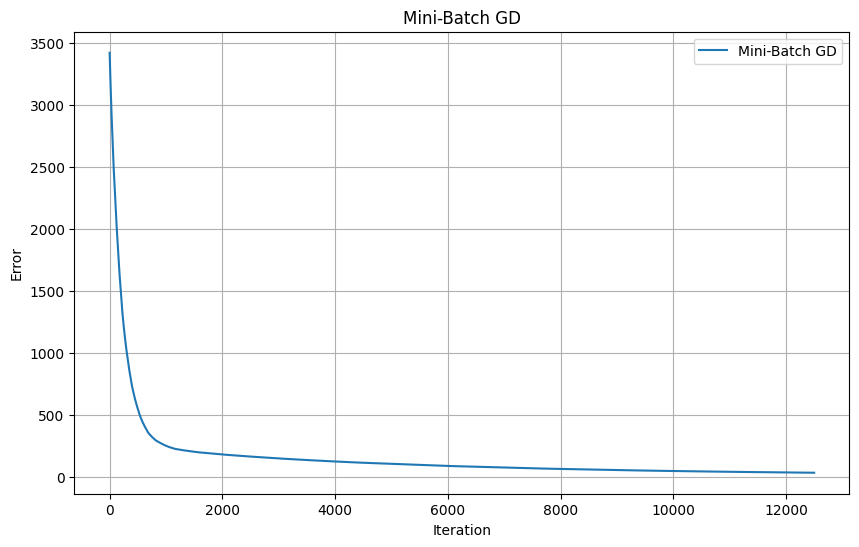

In [14]:
def mini_batch_gd(x, y, lr=0.001, epoch=10, batch_size=8, random_weight=False):
    m, n = x.shape
    err_history = []
    err_history_epoch = []
    
    if not random_weight:
        w = np.zeros(n)
    else:
        np.random.seed(10)
        w = np.random.randn(n)

    for e in range(epoch):
        err_history_epoch.append(mse(y, x.dot(w)))
        
        indices = np.random.permutation(m)
        x = x[indices]
        y = y[indices]
        
        for i in range(0, m, batch_size):
            xi = x[i:i + batch_size]
            yi = y[i:i + batch_size]

            y_pred = xi @ w

            mse_err = mse(y, x.dot(w))
            err_history.append(mse_err)

            error = y_pred - yi
            gradient = xi.T.dot(error) / batch_size

            w -= lr*gradient

        
        print(f"iteration {e+1}, mse loss: {mse_err}")

    return w, err_history, err_history_epoch

mbgd_weights, mbgd_history, mbgd_history_epoch = mini_batch_gd(X_train, y_train)
plot_error(mbgd_history, "Mini-Batch GD")

### SGD

iteration 1, mse loss: 46.42093241569887
iteration 2, mse loss: 13.775319830009444


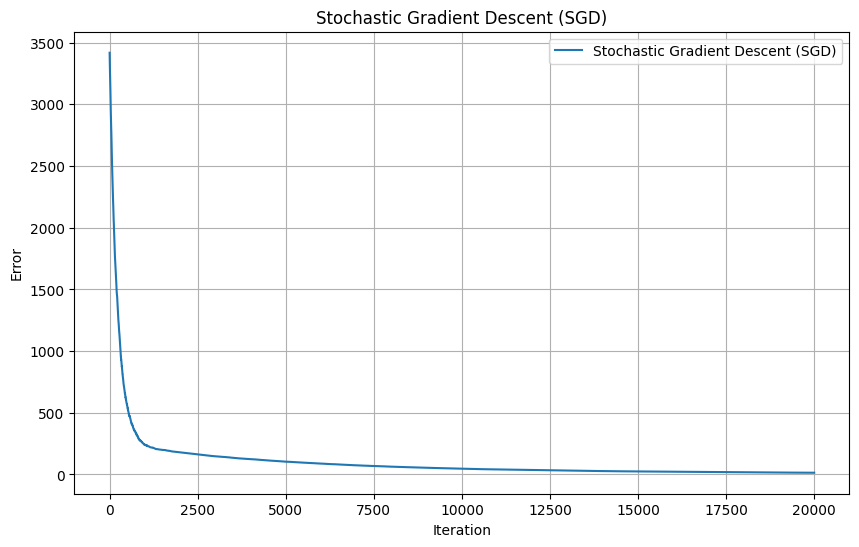

In [15]:
def sgd(x, y, lr=0.001, epoch=2, random_weight=False):
    m, n = x.shape
    err_history = []
    err_history_epoch = []
    if not random_weight:
        w = np.zeros(n)
    else:
        np.random.seed(10)
        w = np.random.randn(n)

    for e in range(epoch):
        err_history_epoch.append(mse(y, x@w))
        
        for i in range(m):
            xi = x[i, :].reshape(1, -1)
            yi = y[i]

            y_pred = xi.dot(w)

            mse_err = mse(y, x@w)
            err_history.append(mse_err)

            error = y_pred - yi
            gradient = xi.T.dot(error)

            w -= lr*gradient.flatten()

        print(f"iteration {e+1}, mse loss: {mse_err}")

    return w, err_history, err_history_epoch

sgd_weights, sgd_history, sgd_history_epoch = sgd(X_train, y_train)
plot_error(sgd_history, "Stochastic Gradient Descent (SGD)")

## 2.2

To show the differences in their speed I train these models again with same epoch number: `10`, so we can plot it more accurately. 

iteration 1, mse loss: 217.6843398003899
iteration 2, mse loss: 163.37091530662974
iteration 3, mse loss: 129.52091784945262
iteration 4, mse loss: 103.87268507702606
iteration 5, mse loss: 84.09436243880734
iteration 6, mse loss: 68.65149331027335
iteration 7, mse loss: 56.48721398291082
iteration 8, mse loss: 46.827463290660354
iteration 9, mse loss: 39.119539377521605
iteration 10, mse loss: 32.901336031214896
iteration 1, mse loss: 46.42093241569887
iteration 2, mse loss: 13.775319830009444
iteration 3, mse loss: 6.946590341823376
iteration 4, mse loss: 5.167229249131272
iteration 5, mse loss: 4.611475849101682
iteration 6, mse loss: 4.416731226769937
iteration 7, mse loss: 4.344320129775531
iteration 8, mse loss: 4.316626269808237
iteration 9, mse loss: 4.305880463461879
iteration 10, mse loss: 4.30166917940398


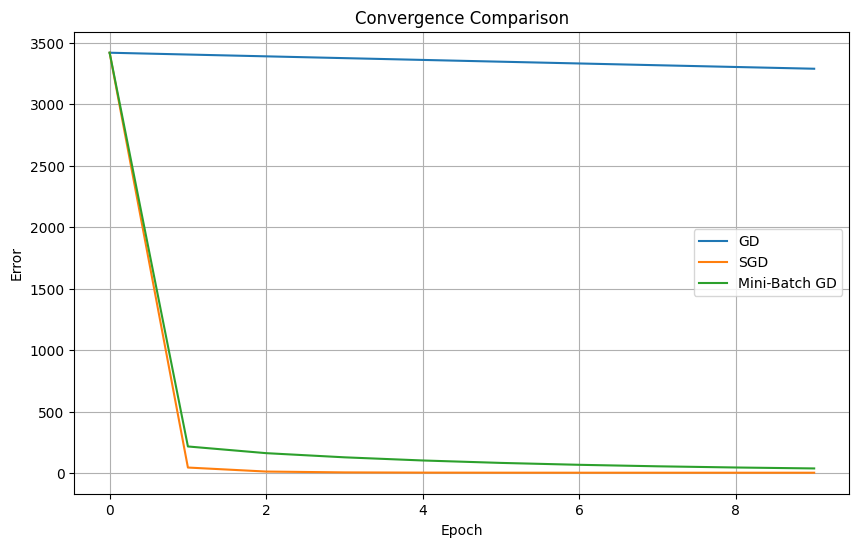

In [21]:
_, gd_history_10 = gradient_descent(X_train, y_train, epoch=10, random_weight=False)
_, _, mbgd_history_epoch_10 = mini_batch_gd(X_train, y_train, epoch=10)
_, _, sgd_history_epoch_10 = sgd(X_train, y_train, epoch=10)

plt.figure(figsize=(10, 6))
plt.plot(gd_history_10, label="GD")
plt.plot(sgd_history_epoch_10, label="SGD")
plt.plot(mbgd_history_epoch_10, label="Mini-Batch GD")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()

***Gradient Descent:***
Uses the entire dataset to compute the gradient for each update.
This means each update is precise but can be slower in terms of runtime, especially for large datasets.
GD usually shows a smooth error curve but may take more iterations to converge (1000 epochs in this case).

***Stochastic Gradient Descent:***
Uses only one data point at each step to compute the gradient.
This makes the updates noisy, causing fluctuations in the error at each step.
SGD can converge faster in terms of iterations because it updates the weights more frequently, but it may not achieve the same minimum error as GD due to the noisy updates.

***Mini-Batch Gradient Descent (MBGD):***
Uses a subset (batch) of the dataset for each update, which is a balance between GD and SGD.
MBGD generally achieves faster convergence than GD while reducing the noise present in SGD.
It’s more stable than SGD and often reaches a lower minimum error compared to SGD, especially when the batch size is well-tuned.

# **3**

## 3.1

In [22]:
gd_zero_weights, gd_zero_history = gradient_descent(X_train, y_train, epoch=1000, random_weight=False)

iteration 100, mse loss: 2247.201647567106
iteration 200, mse loss: 1501.7044525094898
iteration 300, mse loss: 1032.5899644525773
iteration 400, mse loss: 736.71961135982
iteration 500, mse loss: 549.460824409858
iteration 600, mse loss: 430.31055856405504
iteration 700, mse loss: 353.88639071005804
iteration 800, mse loss: 304.2811650192195
iteration 900, mse loss: 271.52537683162524
iteration 1000, mse loss: 249.3703531693002


In [23]:
gd_random_weights, gd_random_history = gradient_descent(X_train, y_train, epoch=1000, random_weight=True)

iteration 100, mse loss: 2200.0230265633077
iteration 200, mse loss: 1476.1340561199609
iteration 300, mse loss: 1020.5075366132572
iteration 400, mse loss: 733.0371342576954
iteration 500, mse loss: 550.9904163071241
iteration 600, mse loss: 435.05505057831874
iteration 700, mse loss: 360.5947718411569
iteration 800, mse loss: 312.1700046734175
iteration 900, mse loss: 280.10425578892915
iteration 1000, mse loss: 258.33247060771555


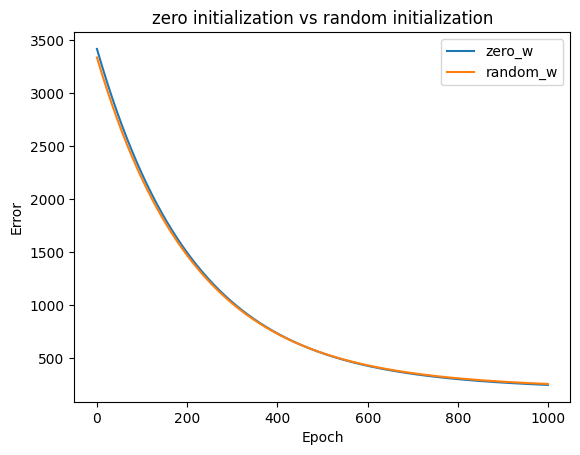

In [24]:
plt.plot(gd_zero_history, label="zero_w")
plt.plot(gd_random_history, label="random_w")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("zero initialization vs random initialization")
plt.legend()
plt.show()

Initiaizing weights with zero end up in the `249.3` loss and with random it ended up in `258.3` which is slightly wors here for random initilization but generally random initialization is better because it helps break the symmetry and help model to learn diverse festures.

## 3.2

Iteration 1, MAE loss: 32.81247450001465
Iteration 2, MAE loss: 17.87173887288679
there are 0 non differentiable points in the dataset


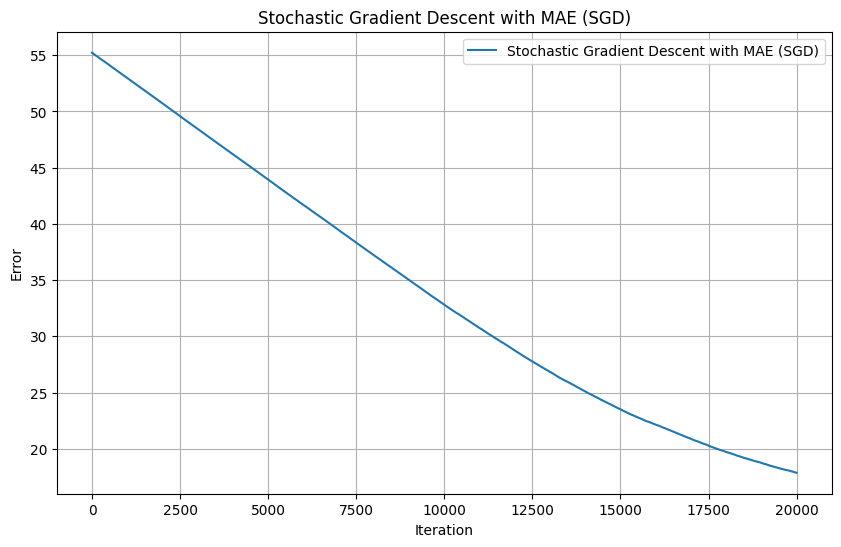

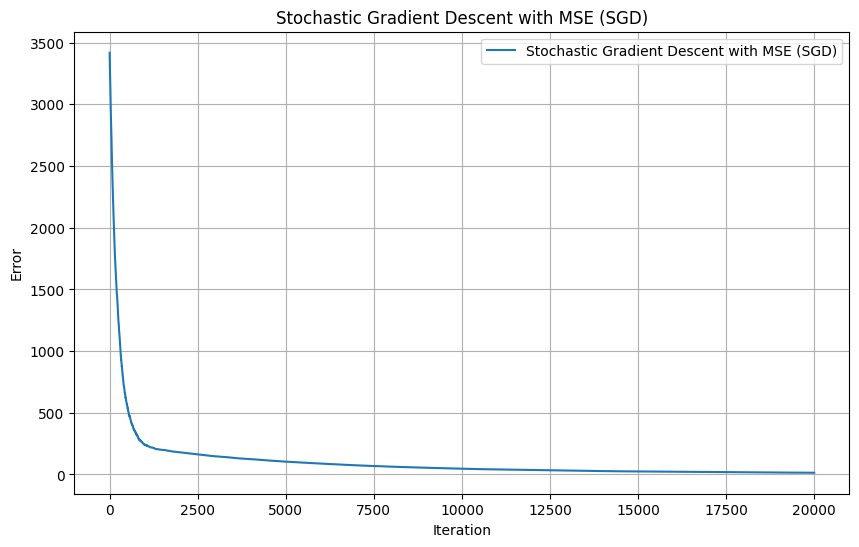

In [25]:
def sgd_with_mae(x, y, lr=0.001, epoch=2, random_weight=False):
    m, n = x.shape
    err_history = []
    err_history_epoch = []
    non_differentiable_points = 0
    
    if not random_weight:
        w = np.zeros(n)
    else:
        np.random.seed(10)
        w = np.random.randn(n)

    for e in range(epoch):
        err_history_epoch.append(mse(y, x@w))
        
        for i in range(m):
            xi = x[i, :].reshape(1, -1)
            yi = y[i]

            y_pred = xi.dot(w)

            mae_err = mae(y, x@w)
            err_history.append(mae_err)

            # using sub-gradient for MAE
            error = y_pred - yi
            if error == 0:
                non_differentiable_points += 1
            gradient = np.sign(error) * xi.T 

            w -= lr*gradient.flatten()

        
        print(f"Iteration {e+1}, MAE loss: {mae_err}")

    return w, err_history, err_history_epoch, non_differentiable_points

sgd_weights, sgd_mae_history, sgd_mae_history_epoch, non_differentiable_points = sgd_with_mae(X_train, y_train)
print(f"there are {non_differentiable_points} non differentiable points in the dataset")
plot_error(sgd_mae_history, "Stochastic Gradient Descent with MAE (SGD)")
plot_error(sgd_history, "Stochastic Gradient Descent with MSE (SGD)")

**MAE Loss:** Instead of MSE, which is `(1/m) ∑ (y - y_pred)^2`, the MAE loss is `(1/m) ∑ |y - y_pred|`.

**Gradient Calculation for MAE**: Since the MAE function uses an absolute value, the gradient of MAE is not continuous. For MAE, the gradient is:
     \begin{cases} 
      -1 & \text{if } y - y_{\text{pred}} > 0 \\
      +1 & \text{if } y - y_{\text{pred}} < 0 \\
      0 & \text{if } y - y_{\text{pred}} = 0 
     \end{cases}
     
For efficient computation, we can use `np.sign(y - y_pred)`, which returns -1, 0, or 1 as required.


**MSE**: Tends to penalize larger errors more heavily, leading to potentially larger updates when errors are high.

**MAE**: Treats all errors equally, which can make it less sensitive to outliers but may converge more slowly.

## 3.3

iteration 100, mse loss: 1.9502038665681912e+28
iteration 200, mse loss: 2.1508592104774045e+53
iteration 300, mse loss: 2.372159866258635e+78
iteration 400, mse loss: 2.6162300180676155e+103
iteration 500, mse loss: 2.8854124061349445e+128
iteration 600, mse loss: 3.1822908138737983e+153
iteration 700, mse loss: 3.5097148686730865e+178
iteration 800, mse loss: 3.870827394429782e+203
iteration 900, mse loss: 4.2690945783674804e+228
iteration 1000, mse loss: 4.708339241701438e+253


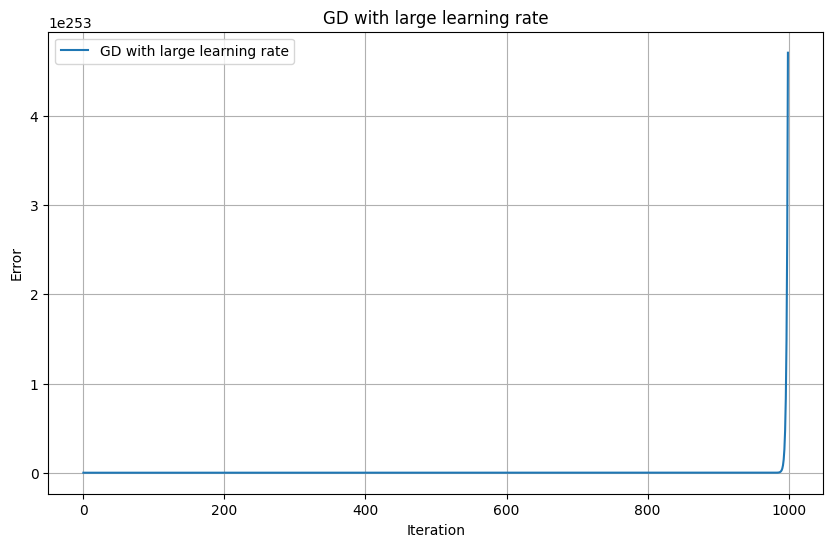

In [26]:
large_lr = 1
gd_large_lr_weights, gd_large_lr_history = gradient_descent(X_train, y_train, lr=large_lr)
plot_error(gd_large_lr_history, "GD with large learning rate")

As we can see by choosing a large learning rate, in this case `1` which is high, the model wont converge and the mse loss will increase significantly after some iterations.

# **4**

In [35]:
def add_qudratic_features(X):
    quadratic = np.power(X, 2)
    return np.hstack((X, quadratic))

# I did this to avoid duplicate bias 
X_train_no_bias = df_no_duplicates.drop(columns=['Index', 'Performance Index'])
X_train_quad_features = add_qudratic_features(X_train_no_bias)
X_train_quad = add_bias(X_train_quad_features)

iteration 100, mse loss: 1945.352909656279
iteration 200, mse loss: 1152.4544354902384
iteration 300, mse loss: 728.9245649794151
iteration 400, mse loss: 500.24436491305306
iteration 500, mse loss: 374.49052916062305
iteration 600, mse loss: 303.235737573908
iteration 700, mse loss: 260.95892149528373
iteration 800, mse loss: 234.20272810166645
iteration 900, mse loss: 215.8638020415081
iteration 1000, mse loss: 202.1859824146226


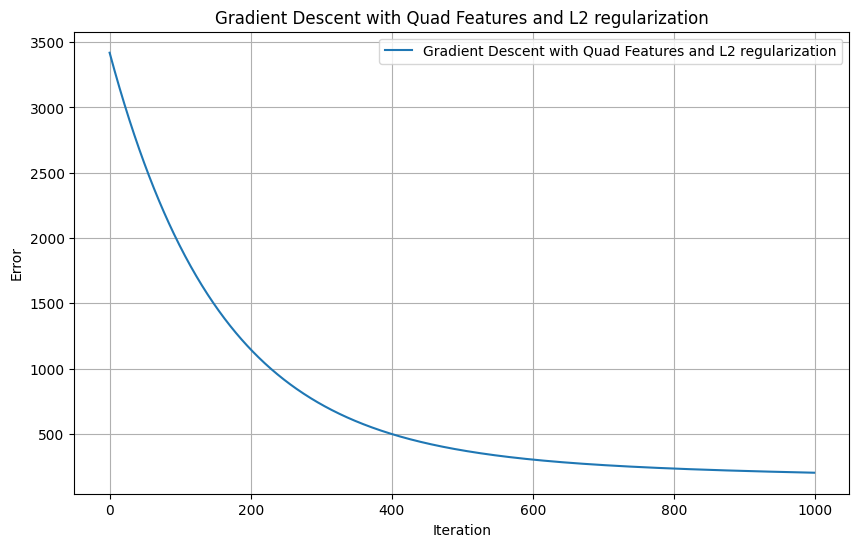

In [37]:
def GD_ridge_regression(x, y, lr=0.001, lamda=0.1, epoch=1000, random_weight=False):
    m, n = x.shape
    err_history = []
    if not random_weight:
        w = np.zeros(n)
    else:
        np.random.seed(10)
        w = np.random.randn(n)

    for i in range(epoch):
        y_pred = x @ w

        mse_err = mse(y, y_pred)
        err_history.append(mse_err)

        # gradient calculation with ridge regression
        error = y_pred - y
        gradient = (x.T @ error) / m + (lamda / m) * w

        w = w - (lr*gradient)

        if (i+1) % 100 == 0:
            print(f"iteration {i+1}, mse loss: {mse_err}")

    return w, err_history

gd_weights_quad, gd_history_quad = GD_ridge_regression(X_train_quad, y_train, random_weight=False)
plot_error(gd_history_quad, "Gradient Descent with Quad Features and L2 regularization")

# Further Practice

1. compare the accuracy of the model with `df_dropNull` dataset to see if predicting missing values helped or not.
2. use another normalization method like `StandardScaler()` and compare the results.
3. do regularization and feature engineering.
4. use more complex regressions, like polynomial regression.